# Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection 
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory Data Analysis and Data Cleaning

##### Shape of the data 

In [4]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")


Number of rows : 1000
Number of columns : 8


##### Cheking Info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Cheking statistical information of data 

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Cheking missing values 

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Cheking duplicated rows 

In [8]:
df.duplicated().sum()

0

##### Number of Numerical and Categorical Features 

In [9]:
# Numerical Features 
num_features = [col for col in df.columns if df[col].dtype != 'O']
print(f"Number of Numerical Features : {len(num_features)}, {num_features}")

# Categorical Features
cat_features = [col for col in df.columns if df[col].dtype == 'O']
print(f"Number of Categorical Features : {len(cat_features)}, {cat_features}")


Number of Numerical Features : 3, ['math_score', 'reading_score', 'writing_score']
Number of Categorical Features : 5, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Obervation : 
- There are no missing values in the dataset.
- There are no duplicates values in the dataset. 
- Average scores indicate better performance in reading and writing compared to math and also there is a minimum score 0 for math, writing score is 10 and reading score is 17.
- Mean and median values are close, suggesting mostly symmetric distributions with slight skew.
- Standard deviation values indicate moderate variability across all subjects.
- Number of Numerical Features : **3**
- Number of Categorical Features : **5**
- Total rows are **1000** and total columns are **8**

##### Checking categorical columns 

In [10]:
for col in cat_features:
    print(f"{df[col].value_counts()}")
    print("-"*40)

gender
female    518
male      482
Name: count, dtype: int64
----------------------------------------
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
----------------------------------------
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
----------------------------------------
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
----------------------------------------
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
----------------------------------------


##### Here, creating new features **total_score** and **average** as our target features

In [11]:
# Creating total_score 
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Creating average
df['average'] = df['total_score']/3

# Checking dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Visualization 

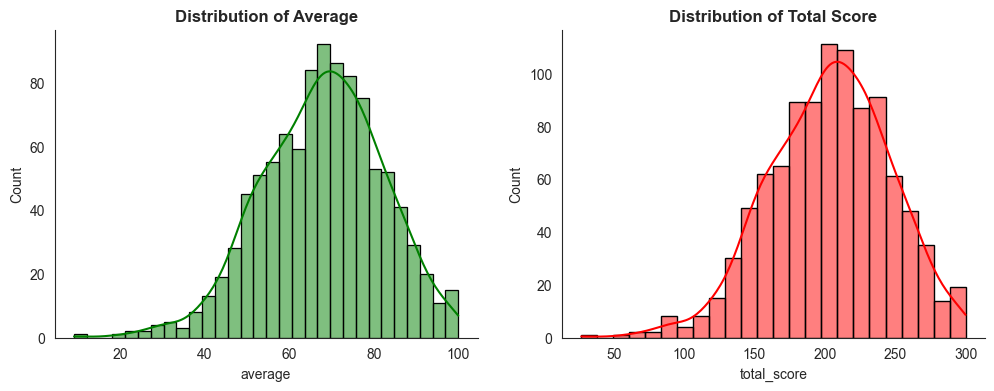

In [ ]:
# Distribution of average and total_score
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(121)
plt.title('Distribution of Average',fontweight='bold')
sns.histplot(data=df,x='average',bins=30,kde=True,color='g', edgecolor = 'black')
plt.subplot(122)
plt.title('Distribution of Total Score', fontweight='bold')
sns.histplot(data=df,x='total_score',kde=True,color='r', edgecolor = 'black')
sns.despine()
plt.show()

#### Observation : 
- Both **average** and **total_score** are some left skewed tend to be some outliers.
- Data is normally distributed.
- Female students are performing well in comparison to male students.

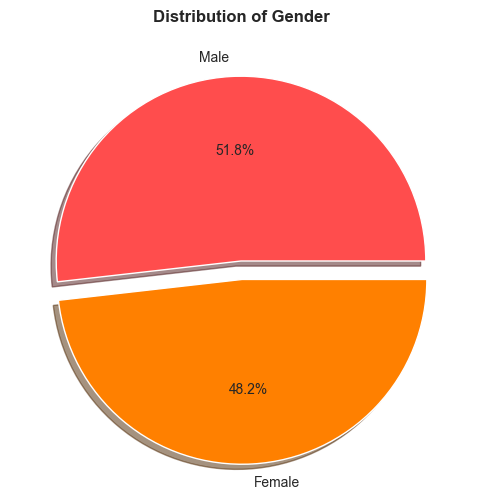

In [109]:
# Distribution of Gender
plt.figure(figsize=(8,6))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.title('Distribution of Gender', fontweight='bold')
plt.show()

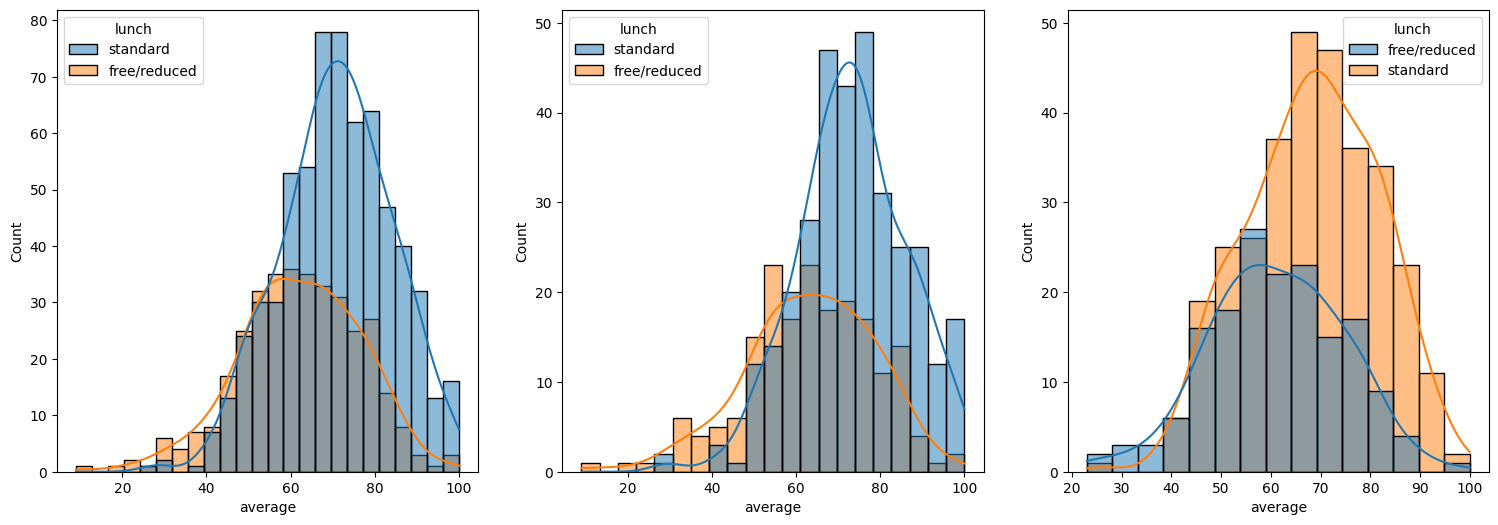

In [20]:
# Distriution of lunch 
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

#### Observation :
- Standard lunch helps perform well in exams be it a male or a female.

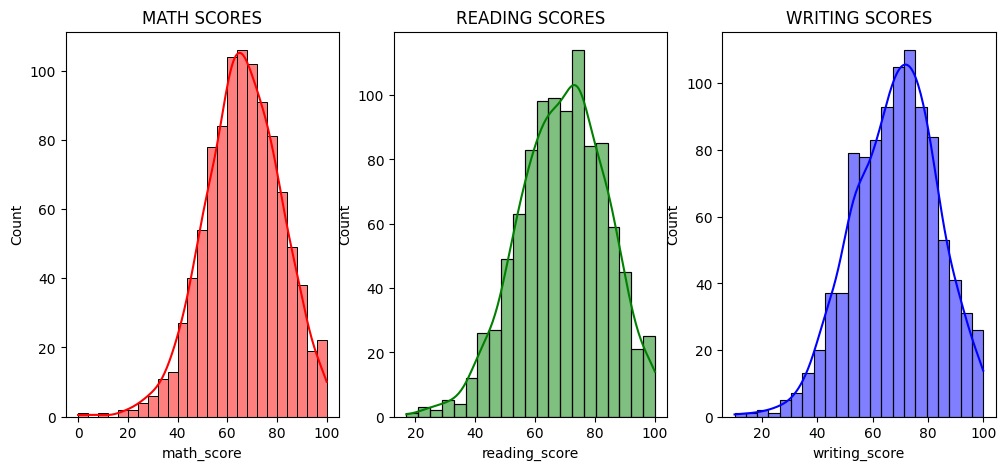

In [47]:
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.histplot(x='math_score',data=df,kde=True, color='red')
plt.title('MATH SCORES')

plt.subplot(132)
sns.histplot(x='reading_score',data=df,kde=True,color='green')
plt.title('READING SCORES')

plt.subplot(133)
sns.histplot(x='writing_score',data=df,kde=True,color='blue')
plt.title('WRITING SCORES')

plt.show()

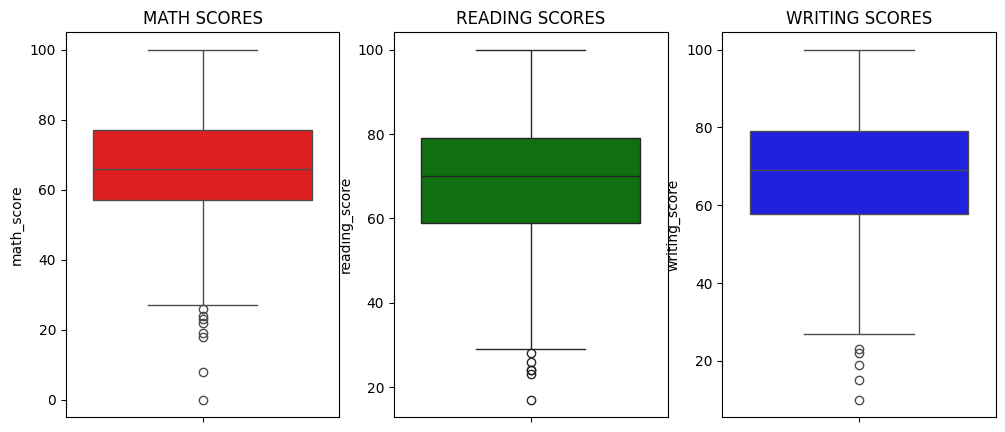

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.boxplot(y='math_score',data=df,color='red')
plt.title('MATH SCORES')

plt.subplot(132)
sns.boxplot(y='reading_score',data=df,color='green')
plt.title('READING SCORES')

plt.subplot(133)
sns.boxplot(y='writing_score',data=df,color='blue')
plt.title('WRITING SCORES')

plt.show()

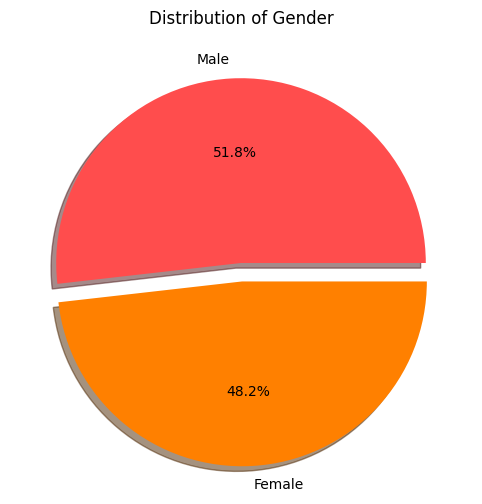

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.title('Distribution of Gender')
plt.show()

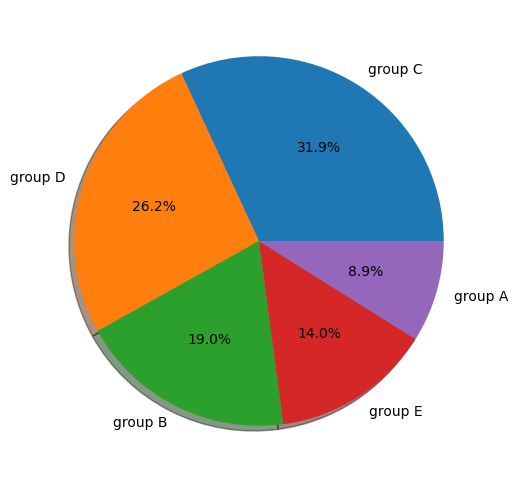

In [72]:
plt.figure(figsize=(8,6))
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',shadow=True)
plt.show()   

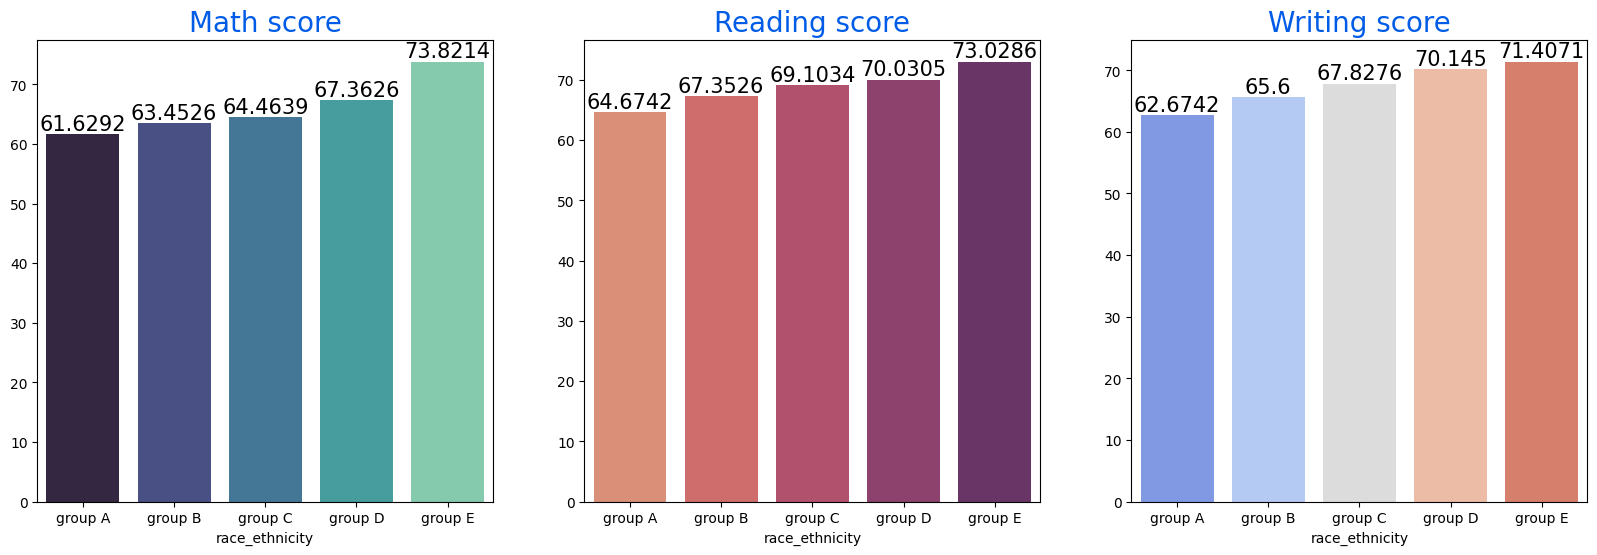

In [79]:
Group_data2=df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)